## Modelo de Ising

*Lattice models are a big industry within statistical mechanics* (Sethna)

Los modelos de algún grado de libertad grillas de $D$ dimensiones se utilizan como modelos de muchos fenómenos en las ciencias.
- Este es el caso para; por ejemplo, modelar el magnetismo, estudiar el comportamiento de las propiedades macroscópicas de los materiales, estudiar conductividad y funciones de correlación, entre otras aplicaciones.
- Los modelos en la grilla se utilizan para fines fundamentales como en teorías de campo.
- Adicionalmente, funcionan como ejemplos primitivos de diversas realizaciones experimentales.

Los modelos en la grilla son modelos que contienen **alguna variable en cada elemento de la grilla** y se utiliza una función conocida como **Hamiltoniano** para describir la energía de estas variables.
- El modelo de Ising corresponde al modelo más estudiado en la física y nos da un modelo tangible para aplicar lo que hemos estudiado con respecto a la teoría de la variable aleatoria. 

### El modelo

El modelo de Ising fue originalmente utilizado para describir el magnetismo. En este caso, se utiliza un grado de libertad $s_i$ en cada punto de la grilla, comunmente llamado **espín**. 

Cada variable $s_i$ puede tomar dos valores: $+1$ o $-1$. 

<img src="ising.png" width="250" height="400">

En general, para el modelo clásico, nos interesan grillas dos o tres dimensionales (para el caso cuántico, incluso el modelo de Ising en una dimensión es ferviertemente estudiado). El modelo se describe mediante una función de energía conocida como **Hamiltoniano**, que para este caso toma la forma
$$
H(\mathbf{s}) = -\sum_{\langle ij \rangle} J s_i s_j - h \sum_{i} s_i,
$$
donde:
- $J$ corresponde al **acople** espín-espín,
- $h$ corresponde a la energía que introduce un campo externo y
- $\langle ij \rangle$ corresponde a una suma que solo toma en cuenta los pares de espines **vecinos**.

Se puede notar que la energía de dos espines vecinos $-J s_i s_j$ es
- $-J$ si los espines están alineados.
- $J$ si los espines están antiparalelos.

Entonces, dependiendo del signo de $J$, el modelo favorece distintas configuraciones:
- Si $J > 0$, el modelo favorece espines paralelos y decimos que la interacción es **ferromagnética**.
- Si $J < 0$, el modelo favorece espines antiparalelos y decimos que la interacción es **paramagnética**.

Una de las preguntas más fundamentales con respecto a este modelo corresponde a qué sucede con la **magnetización total del modelo con respecto a la temperatura**. La magnetización en este caso se define como
$$
M(\mathbf{s}) \equiv \sum_i s_i.
$$
- ¿Qué esperamos que suceda con respecto a la temperatura?
Dependiendo de la temperatura, los espines se van a organizar a la mayoría apuntando hacia arriba o la mayoría apuntando hacia abajo; o, en su defecto, a estar completamente desalineados.
- Si $J > 0$:
    * A bajas temperaturas, los espines se organizarán en una dirección formando una **fase ferromagnética**.
    * A altas temperaturas, los espines tienen suficiente energía para estar en cualquier configuración, de manera tal que se forma una **fase paramagnética**.

Es de esperar, entonces, que haya una **temperatura de transición** que divide las dos fases, comunmente conocida como la **temperatura de Curie**.
Este modelo es uno de los modelos más utilizados para estudiar **transiciones de fase**.

### Solución al modelo de Ising

Existen diversas formas de atacar el problema:
1. El modelo en una dimensión tiene solución analítica (propuesta por Ising).
2. El modelo en dos dimensiones tiene solución analítica (propuesta por Onsager).
3. Aplicar el método de cadenas de Markov en la computadora.

La solución corresponde a encontrar **la configuración de equilibrio térmico** que satisface la **distribución de Boltzmann**:
$$
P^*(\mathbf{s}) = \frac{1}{Z} e^{-\beta H(\mathbf{s})}, \qquad \beta = \frac{1}{k_B T}.
$$

Con base en el método de cadenas de Markov, la idea es generar una realización de una cadena de Markov para muchas configuraciones:
$$
\mathbf{s}^{(0)} \to \mathbf{s}^{(1)} \to \mathbf{s}^{(2)} \to \cdots
$$
y para cada paso
1. Seleccionar un sitio $i$ uniformemente al azar.  
2. Proponer **un flip local**:
   $$
   s_i \to -s_i.
   $$
3. Aceptar o rechazar el cambio según un criterio probabilístico.

#### Cambio energético de un flip local

Al realizar un flip, la configuración energética cambia. Es importante entender este cambio de energía, dado que el cambio estará relacionado con la forma de encontrar la configuración de equilibrio.

Despues de realizar un flip local en la posición $i$, la nueva configuración es $\mathbf{s}'$. Queremos:
$$
\Delta E = H(\mathbf{s}') - H(\mathbf{s}).
$$
Escribimos el Hamiltoniano separando la contribución asociada al sitio $i$:
$$
H(\mathbf{s}) = H_{\text{resto}}(\mathbf{s}_{\setminus i}) + H_i(s_i; \{s_j\}_{j\in nn(i)}),
$$
donde
$$
H_i(s_i; \{s_j\}) = -J s_i \sum_{j\in nn(i)} s_j - h s_i.
$$
El término $H_{\text{resto}}$ no cambia al hacer el flip. Este término de energía local puede ser utilizado para calcular el cambio de energía. Antes del flip, tenemos
$$
H_i^{\text{antes}} = -J s_i \sum_{j\in nn(i)} s_j - h s_i.
$$
Luego, después del flip $s_i'=-s_i$:
$$
H_i^{\text{desp}} = -J (-s_i) \sum_{j\in nn(i)} s_j - h (-s_i) = J s_i \sum_{j\in nn(i)} s_j + h s_i.
$$
De esta forma, obtenemos
\begin{align}
\Delta E &= \left( J s_i \sum_{j\in nn(i)} s_j + h s_i \right) - \left( -J s_i \sum_{j\in nn(i)} s_j - h s_i \right) \\
&= 2J s_i \sum_{j\in nn(i)} s_j + 2 h s_i \\
&= 2 s_i \left( J \sum_{j\in nn(i)} s_j + h \right).
\end{align}
De esta forma:
- Si $s_i$ está alineado con sus vecinos, $\Delta E > 0$ y el flip aumenta la energía.  
- Si está desalineado, $\Delta E < 0$ y el flip disminuye la energía.

Por ejemplo, para un caso típico de una grilla cuadrada con $J = 1$ y $h = 0$, cada sitio tiene 4 vecinos.
La suma de vecinos puede ser:
$$
S_{\text{vec}} \in \{-4, -2, 0, 2, 4\}.
$$
Entonces:
$$
\Delta E = 2 s_i S_{\text{vec}}, \qquad s_i = \pm 1.
$$
Esto implica que los posibles valores para el cambio de energía son
$$
\Delta E \in \{-8, -4, 0, 4, 8\}.
$$

### Método de Metropolis-Hastings para la configuración de equilibrio

Dada una propuesta $\mathbf{s} \to \mathbf{s}'$, la tasa de aceptación corresponde a (ver markovchains2.ipynb):
$$
\alpha_{\mathbf{s} \to \mathbf{s}'} = {\textrm{min}}\Bigg(\frac{P^*_{\mathbf{s}'} Q_{\mathbf{s} \to \mathbf{s}'}}{P^*_{\mathbf{s}} Q_{\mathbf{s}' \to \mathbf{s}}}, 1 \Bigg).
$$
En este caso, podemos utilizar una matriz de transición simétrica y **aplicar el criterio de Metropolis**, tal que
\begin{align}
\alpha_{\mathbf{s} \to \mathbf{s}'} &= {\textrm{min}}\Bigg(\frac{P^*_{\mathbf{s}'}}{P^*_{\mathbf{s}}}, 1 \Bigg) \\
&= {\textrm{min}}\Bigg(e^{-\beta (H(\mathbf{s}') - H(\mathbf{s}))}, 1 \Bigg) \\
&= {\textrm{min}}\Bigg(e^{-\beta \Delta E}, 1 \Bigg).
\end{align}

### Algoritmo
Para cada paso:
1. Elegir un sitio $i$.
2. Calcular $\Delta E = 2J s_i \sum_{j\in nn(i)} s_j$.
3. Si $\Delta E \le 0$: aceptar automáticamente.  
4. Si $\Delta E > 0$: aceptar con probabilidad $e^{-\beta\Delta E}$.
5. Reemplazar $s_i \leftarrow -s_i$ si el cambio fue aceptado.

Esta formulación garantiza **detalle balanceado**.
$$
P^*_{\mathbf{s}} Q_{\mathbf{s} \to \mathbf{s}'} \alpha_{\mathbf{s} \to \mathbf{s}'} = P^*_{\mathbf{s}'} Q_{\mathbf{s}' \to \mathbf{s}} \alpha_{\mathbf{s}' \to \mathbf{s}},
$$
lo cual implica que se garantiza la convergencia al equilibrio.

### Implementación de Metropolis-Hastings para el modelo de Ising

Para la implementación, consideremos el caso 2D. La energía introducida por un campo externo introduce otra escala energética en el problema y es relevante en muchos modelos. Vamos a incluir esta escala en nuestros cálculos.

La mejor estructura de datos que podemos utilizar para la grilla es un `numpy.ndarray`. De hecho, si empezamos con una configuración inicial aleatoria, podemos utilizar el siguiente constructor:

In [1]:
import numpy as np

L = 4
lattice = np.random.choice([-1, 1], size=(L, L))

print(lattice)

[[ 1 -1  1  1]
 [-1 -1  1 -1]
 [-1  1 -1 -1]
 [ 1 -1 -1 -1]]


El algoritmo requiere el cálculo de $\Delta E$ para evaluar el parámetro de aceptación $\alpha_{\mathbf{s} \to \mathbf{s}'}$. Escribamos una función que realiza esta operación:

In [32]:
def deltaE(lattice, i, j, J = 1.0, h = 0.0):
    # Implemente aquí su función. Considere el caso particular de condiciones periódicas.
    L = lattice.shape[0]
    
    sum = lattice[i][(j+1)%L] + lattice[i][(j-1)%L] + lattice[(i+1)%L][j] + lattice[(i-1)%L][j]

    return 2 * lattice[i][j] * (J * sum + h)

La siguiente etapa de nuestra implementación corresponde a implementar un solo paso de la realización de la cadena de Markov. Es decir, debemos proponer un cambio y evaluar si se acepta o se rechaza de acuerdo con el criterio de Metropolis. Escribamos una función que realiza $L \times L$ nuevas propuestas y llamemos a eso un `metropolisStep`. ¡Recuerde que los `numpy.ndarray` son `mutables`! 

In [154]:
def metropolisStep(lattice, beta, J = 1.0, h = 0.0):
    # Implemente aquí su función.
    L = lattice.shape[0]
    
    for k in range(L*L):

        i = np.random.choice(range(L))
        j = np.random.choice(range(L))
        
        d_E = deltaE(lattice, i, j)

        alpha = np.min((np.exp(-beta * d_E), 1))

        if d_E < 0 or np.random.random() < alpha:
            lattice[i][j] *= -1
                
    return lattice 

Podemos escribir una función que evalúa la magnetización de cierta configuración de la grilla:

In [148]:
def magnetisation(lattice):
    return np.sum(lattice)

Ahora invoquemos la función `metropolisStep` muchas veces para obtener configuraciones que satisfacen el criterio de Metropolis, calculando la magnetización en cada paso para evaluar la magnetización promedio. Es común realizar una cierta cantidad de iteraciones antes de realizar mediciones, es decir, realizar un paso de "pretermalización". Puede utilizar `matplotlib.pyplot.imshow` para visualizar la configuración final. ¿Se atreve a realizar un diagrama de fases con respecto a la magnetización como función de la temperatura? En este modelo, a la magnetización promedio se le conoce como un **parámetro de orden**. El parámetro de orden identifica el rompimiento de una simetría de una fase a otra. 

In [176]:
N = 1_000
preterm = 400

beta = 0.5

magnet_samples = np.zeros(N-preterm)

for k in range(N):
    
    lattice = metropolisStep(lattice, beta, h = 100)

    if k >= preterm:
        magnet_samples[k-preterm] = magnetisation(lattice)

In [177]:
magnet_samples.mean()

np.float64(-2.26)

<function matplotlib.pyplot.show(close=None, block=None)>

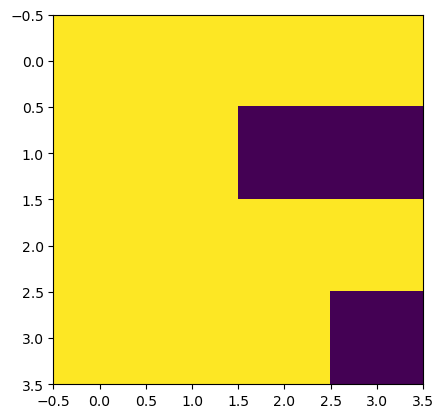

In [178]:
import matplotlib.pyplot as plt

plt.figure()

plt.imshow(lattice)

plt.show

In [193]:
L = 4
lattice = np.random.choice([-1, 1], size=(L, L))

N = 2_000
preterm = 500

N_T = 40

T_vals = np.linspace(0.1, 8, N_T)
magnet_vals = np.zeros(N_T)

beta_vals = 1/T_vals


for _ in range(N_T):
    
    magnet_samples = np.zeros(N-preterm)
        
    for k in range(N):
            
        lattice = metropolisStep(lattice, beta_vals[_])
        
        if k >= preterm:
            magnet_samples[k-preterm] = magnetisation(lattice)

    magnet_vals[_] = abs(magnet_samples.mean() / (L*L))

<function matplotlib.pyplot.show(close=None, block=None)>

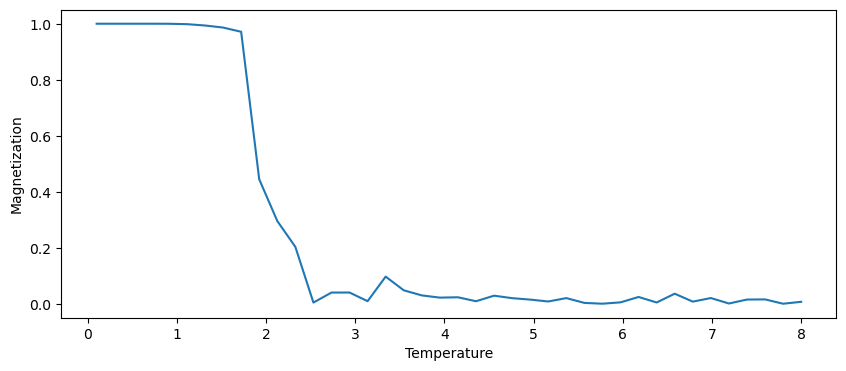

In [198]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.plot(1/beta_vals, magnet_vals, "-")

plt.ylabel("Magnetization")
plt.xlabel("Temperature")

plt.show

In [188]:
beta_vals.shape

(80,)